In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
herectvo = pd.read_json(os.path.join("data", "herectvo.json"))

## Obecná data

In [3]:
len(herectvo["Jméno"].drop_duplicates().to_list())

12114

In [4]:
zijici = herectvo[(~herectvo["Datum narození"].isnull()) & herectvo["Datum úmrtí"].isnull()]["Jméno"].drop_duplicates().to_list()

In [5]:
len(zijici)

2979

In [6]:
df = pd.read_json(os.path.join("data", "filmy.json"))

In [7]:
veskere_herectvo = df.explode("Hrají")["Hrají"].drop_duplicates().to_list()

In [8]:
len(veskere_herectvo)

16093

In [9]:
obsazovanost = pd.Series(herectvo.groupby("Jméno")["Film"].nunique(), name="Obsazovanost")

In [10]:
obsazovanost.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     3.0
0.750     4.0
0.900    14.0
0.950    30.0
0.990    73.0
Name: Obsazovanost, dtype: float64

In [11]:
q = obsazovanost.quantile(0.95)
q

30.0

## Nejdelší a nejplodnější kariéry

In [12]:
delka_kariery = pd.Series(herectvo.groupby("Jméno")["Rok"].max() - herectvo.groupby("Jméno")["Rok"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Jméno
Jiřina Bohdalová (2878)       79
František Kovářík (126912)    77
Zdenka Procházková (42989)    75
Zita Kabátová (839)           73
Jára Kohout (4846)            73
Miroslav Mráz (125568)        71
Svatopluk Beneš (13617)       69
Jiří Novotný (9283)           69
Václav Postránecký (7956)     68
Jaroslava Adamová (11226)     68
Name: Délka kariéry, dtype: int64

In [13]:
delka_kariery = pd.Series(herectvo[(~herectvo["Datum narození"].isnull()) & herectvo["Datum úmrtí"].isnull()].groupby("Jméno")["Rok"].max() - herectvo[(~herectvo["Datum narození"].isnull()) & herectvo["Datum úmrtí"].isnull()].groupby("Jméno")["Rok"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Jméno
Jiřina Bohdalová (2878)     79
Jiří Novotný (9283)         69
Jiří Suchý (2270)           65
Antonín Hardt (19168)       64
Soňa Červená (10930)        63
Miriam Kantorková (3863)    62
Jan Kačer (1165)            62
František Němec (2788)      61
Hanuš Bor (7070)            61
Rudolf Jelínek (6133)       61
Name: Délka kariéry, dtype: int64

In [14]:
delka_kariery = pd.Series(herectvo.groupby("Jméno")["Rok"].max() - herectvo.groupby("Jméno")["Rok"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Jméno
Jiřina Bohdalová (2878)       79
František Kovářík (126912)    77
Zdenka Procházková (42989)    75
Zita Kabátová (839)           73
Jára Kohout (4846)            73
Miroslav Mráz (125568)        71
Svatopluk Beneš (13617)       69
Jiří Novotný (9283)           69
Václav Postránecký (7956)     68
Jaroslava Adamová (11226)     68
Name: Délka kariéry, dtype: int64

In [15]:
herectvo.groupby("Jméno")["Film"].nunique().nlargest(10)

Jméno
Jan W. Speerger (55928)        275
Theodor Pištěk (37366)         247
Eman Fiala (64088)             210
Jaroslav Marvan (9550)         209
Mirko Musil (33555)            192
František Filipovský (4735)    186
Oldřich Velen (12725)          177
Alois Dvorský (127491)         169
Milka Balek-Brodská (28799)    164
Josef Kemr (4897)              162
Name: Film, dtype: int64

In [63]:
df.explode("Hrají").groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan W. Speerger (55928)        281
Theodor Pištěk (37366)         254
Eman Fiala (64088)             214
Jaroslav Marvan (9550)         208
František Filipovský (4735)    181
Alois Dvorský (127491)         169
Milka Balek-Brodská (28799)    166
Oldřich Velen (12725)          166
Josef Kemr (4897)              161
Jaroslav Tomsa (2576)          152
Name: Film, dtype: int64

In [16]:
vsechno_herectvo = herectvo["Jméno"].drop_duplicates().to_list()

In [17]:
nejaktivnejsich500 = herectvo.groupby("Jméno")["Film"].nunique().nlargest(500).index.to_list()

<AxesSubplot:xlabel='Rok'>

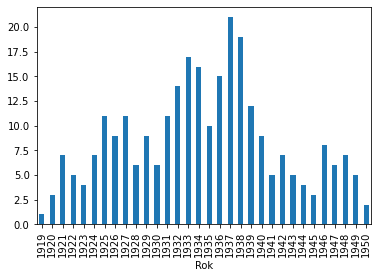

In [18]:
herectvo[herectvo["Jméno"] == "Jan W. Speerger (55928)"].groupby("Rok")["Film"].nunique().plot.bar()

In [19]:
", ".join(herectvo[herectvo["Jméno"] == "Jan W. Speerger (55928)"]["Role"].to_list())

'hráč karet, číšník, nosič, skladník, řidič Karel, horník, vrátný v Portheimce/mistr tiskař, lupič Joe Pelíšek, kočí, dozorce strážmistr Hájek, dozorce v přádelně, strýček na svatbě, divák na představení, posel z velitelství, lodník, muzikant, dražitel, četník ve vlaku, hospodářská kontrola, četník Kraus, mechanik Vondra, vesničan Karel Loukota, německý voják, lupič, rváč, kočí Jan Průcha, horník Stoupa, kasař Jiří Kočka, železničář, nastávající Zacharové, handlíř, muž na veselici, brýlatý hráč karet, dřevař Jura, ředitel hotelu, biřic Malina, četnický strážmistr, tajný v sanatoriu, skalák, porybný, filmový herec, hajný Valenta, divadelní sluha Peterka, host s dětmi, člen představenstva záložny, pískař, kočébr Toník Karpíšek, zahradník Příhoda, policejní inspektor, posluha v hotelu, tajný, recepční úředník hotelu, člen Flokovy bandy, havíř Prokeš, Václav, sluha v penzionu, podkoní, strážník, Karáskův otec, muž na plese, strážník, komorník na zámku Leopold, listonoš, automontér, železni

In [20]:
herectvo[(~herectvo["Datum narození"].isnull()) & herectvo["Datum úmrtí"].isnull()].groupby("Jméno")["Film"].nunique().nlargest(10)

Jméno
Jan Kuželka (1445)            116
Jiří Lábus (838)              114
Jan Přeučil (4990)             99
Karel Hábl (27177)             93
Jiří Krampol (4985)            91
Jan Kraus (1062)               89
Jiřina Bohdalová (2878)        87
Oldřich Vlach (14387)          85
Jitka Zelenohorská (34821)     77
Ondřej Vetchý (836)            77
Name: Film, dtype: int64

In [21]:
herectvo[herectvo["Jméno"] == "Jiřina Bohdalová (2878)"][["Rok","Film","Věk","Role"]].sort_values(by="Rok").head(10)

,Rok,Film,Věk,Role
44151,1937,Pižla a Žižla na cestách (395752),6.0,holčička
44150,1939,Zlatý člověk (395859),8.0,dcerka zraněného dílovedoucího
44148,1940,Madla zpívá Evropě (395922),9.0,"Jiřinka, členka dětského pěveckého sboru"
44147,1940,Dceruška k pohledání (395926),9.0,dítě
44149,1940,Babička (395928),9.0,dítě na dožínkách
44146,1947,Muzikant (396045),16.0,děvče na taneční zábavě
44145,1952,Únos (396149),21.0,tanečnice
44144,1955,Něco se tu změnilo (396202),24.0,zdravotní sestra
44143,1955,Direktiva (396228),24.0,delegátka festivalu
44138,1956,Honzíkova cesta (396263),25.0,sekretářka televize


<AxesSubplot:xlabel='Rok'>

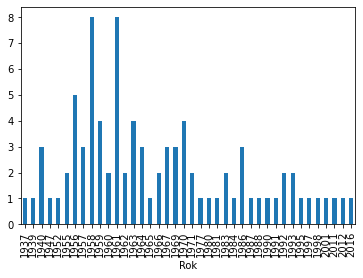

In [22]:
herectvo[herectvo["Jméno"] == "Jiřina Bohdalová (2878)"].groupby("Rok")["Film"].nunique().plot.bar()

## Další rekordy

In [23]:
herectvo[herectvo["Věk"] <= 18].groupby("Jméno")["Film"].nunique().nlargest(10)

Jméno
Vladimír Salač (126323)          21
Vladimír Bejval (15695)          17
Vladimír Zátka (128952)          16
Filip Renč (558)                 15
Jan Kraus (1062)                 15
Michael Hofbauer (13613)         14
Jaroslava Schallerová (75385)    13
Josef Filip (127149)             13
Josef Kemr (4897)                13
Tomáš Holý (27091)               13
Name: Film, dtype: int64

In [24]:
herectvo[herectvo["Věk"] <= 12].groupby("Jméno")["Film"].nunique().nlargest(10)

Jméno
Tomáš Holý (27091)         12
Vladimír Zátka (128952)    12
Jan Kreidl (128115)        10
Josef Filip (127149)       10
Vladimír Bejval (15695)    10
Dagmar Appelová (28474)     9
Hanuš Bor (7070)            9
Lukáš Bech (23548)          9
Michal Koblic (128743)      9
Filip Renč (558)            8
Name: Film, dtype: int64

In [25]:
herectvo[herectvo["Věk"] >= 67].groupby("Jméno")["Film"].nunique().nlargest(10)

Jméno
Josef Střecha (55613)        68
Vlastimila Vlková (27109)    55
Alois Dvorský (127491)       48
Josef Oliak (128024)         41
Antonín Soukup (87404)       37
Marie Rosůlková (4751)       37
Vladimír Hlavatý (34999)     37
Bohdan Lachman (128508)      34
Josef Příhoda (128694)       34
Slávka Hamouzová (84688)     34
Name: Film, dtype: int64

## Kolegové

In [26]:
herectvo["spoluherectvo"] = herectvo["Film"].map(herectvo.groupby("Film")["Jméno"].agg(list))

In [27]:
def kolegove(jmeno):
    kolegove = herectvo[herectvo["Jméno"] == jmeno]["spoluherectvo"].to_list()
    kolegove2 = [item for kolegove in kolegove for item in kolegove]
    kolegove = []
    for k in kolegove2:
        if k not in kolegove:
            kolegove.append(k)
    return(kolegove)

In [28]:
len(kolegove("Jiřina Bohdalová (2878)"))

1282

In [29]:
spoluherci = {}
for n in nejaktivnejsich500:
    spoluherci[n] = len(kolegove(n))
spoluherci = pd.Series(spoluherci)

In [30]:
spoluherci.sort_values(ascending=False).head(30)

Mirko Musil (33555)            2175
Jaroslav Tomsa (2576)          2159
Oldřich Velen (12725)          2012
Josef Somr (1054)              1966
Jan Kuželka (1445)             1946
Zdeněk Srstka (7960)           1934
Jiří Lábus (838)               1901
Lubomír Kostelka (841)         1878
Jan Skopeček (8252)            1861
František Filipovský (4735)    1830
Josef Kemr (4897)              1817
Vladimír Hlavatý (34999)       1792
Jiří Lír (4926)                1771
Jan Přeučil (4990)             1770
Karel Engel (14390)            1768
Karel Hovorka (76534)          1750
Raoul Schránil (5103)          1749
Jan Pohan (7665)               1745
Jan Kraus (1062)               1738
Rudolf Hrušínský st. (4842)    1734
Václav Kotva (2718)            1732
Karel Augusta (5058)           1691
Karel Hábl (27177)             1673
Vladimír Navrátil (12670)      1666
Zdeněk Skalický (126510)       1649
Vladimír Hrabánek (1449)       1648
Marek Vašut (3566)             1636
Jiří Kodet (7135)           

## Červí díry

In [31]:
prvni = herectvo["Rok"].min()
posledni = herectvo["Rok"].max()

In [32]:
prvni_herectvo = herectvo[herectvo["Rok"] == prvni]["Jméno"].drop_duplicates().to_list()

In [33]:
posledni_herectvo = herectvo[herectvo["Rok"] == posledni]["Jméno"].drop_duplicates().to_list()

In [34]:
cervi_diry = []
cervi_filmy = []
for n in vsechno_herectvo:
    spolu = kolegove(n)
    for x in prvni_herectvo:
        if x in spolu:
            for y in posledni_herectvo:
                if y in spolu:
                    print(f"{n}, {x}, {y}")
                    n_filmy = herectvo[herectvo["Jméno"] == n]["Film"].drop_duplicates().to_list()
                    y_filmy = herectvo[herectvo["Jméno"] == y]["Film"].drop_duplicates().to_list()
                    z_filmy = []
                    for nf in n_filmy:
                        if nf in y_filmy:
                            z_filmy.append(nf)
                            cervi_filmy.append(nf)
                    print(z_filmy)
                    print("***")
                    if n not in cervi_diry:
                        cervi_diry.append(n)

Ela Šárková (126039), Josef Šváb-Malostranský (55291), Jan Kuželka (1445)
['V hlavní roli Oldřich Nový (397270)', 'Hodinářova svatební cesta korálovým mořem (397250)', 'Skandál v Gri-Gri baru (397189)', 'Všichni proti všem (397142)']
***
Ela Šárková (126039), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['...a zase ta Lucie! (397427)']
***
Ela Šárková (126039), Josef Šváb-Malostranský (55291), Pavel Nový (510)
['Přátelé bermudského trojúhelníku (397557)']
***
Marie Grossová (126416), Josef Šváb-Malostranský (55291), František Němec (2788)
['Fantom Morrisvillu (396706)']
***
Ela Poznerová (126572), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['Léto s kovbojem (397114)']
***
L. H. Struna (126711), Josef Šváb-Malostranský (55291), Jan Kuželka (1445)
['Zbraně pro Prahu (397041)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Jan Kuželka (1445)
['Vítězný lid (397143)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Daniela Kolářo

In [35]:
cervi_diry

['Ela Šárková (126039)',
 'Marie Grossová (126416)',
 'Ela Poznerová (126572)',
 'L. H. Struna (126711)',
 'František Kovářík (126912)',
 'Antonín Meisner (127732)',
 'Gabriela Bártlová-Buddeusová (127814)',
 'Fred Bulín (128225)',
 'Olga Augustová (28479)',
 'Vladimír Hlavatý (34999)',
 'Darja Hajská (35228)',
 'Nataša Gollová (36491)',
 'Václav Wasserman (37326)',
 'Jára Kohout (4846)',
 'Anna Gabrielová (4949)',
 'Slávka Doležalová-Kulhavá (84685)',
 'Zdeněk Štěpánek (87457)',
 'Jaroslav Marvan (9550)']

In [36]:
len(cervi_diry)

18

In [37]:
cervi_filmy

['V hlavní roli Oldřich Nový (397270)',
 'Hodinářova svatební cesta korálovým mořem (397250)',
 'Skandál v Gri-Gri baru (397189)',
 'Všichni proti všem (397142)',
 '...a zase ta Lucie! (397427)',
 'Přátelé bermudského trojúhelníku (397557)',
 'Fantom Morrisvillu (396706)',
 'Léto s kovbojem (397114)',
 'Zbraně pro Prahu (397041)',
 'Vítězný lid (397143)',
 'Na samotě u lesa (397110)',
 'Pasťák (397661)',
 'Kuřata na cestách (396497)',
 'Pasťák (397661)',
 'Akce v Istanbulu (397084)',
 'Smrt na černo (397105)',
 'Transport z ráje (396483)',
 'Fantom Morrisvillu (396706)',
 'Není sirotek jako sirotek (397513)',
 'Velká filmová loupež (397520)',
 'Není sirotek jako sirotek (397513)',
 'Srdečný pozdrav ze zeměkoule (397365)',
 'Zelená vlna (397382)',
 'Zralé víno (397335)',
 'V podstatě jsme normální (397336)',
 'Což takhle dát si špenát (397165)',
 'Náš dědek Josef (397127)',
 'Bouřlivé víno (397122)',
 'Slasti Otce vlasti (396820)',
 'Velká filmová loupež (397520)',
 'Zralé víno (397335)

In [38]:
herectvo[herectvo["Jméno"].isin(cervi_diry)].groupby("Jméno")["Rok úmrtí"].max().sort_values()

Jméno
Václav Wasserman (37326)                 1967.0
Zdeněk Štěpánek (87457)                  1968.0
Olga Augustová (28479)                   1970.0
Marie Grossová (126416)                  1972.0
Fred Bulín (128225)                      1972.0
Jaroslav Marvan (9550)                   1974.0
Antonín Meisner (127732)                 1975.0
Gabriela Bártlová-Buddeusová (127814)    1977.0
Slávka Doležalová-Kulhavá (84685)        1977.0
L. H. Struna (126711)                    1980.0
Darja Hajská (35228)                     1981.0
František Kovářík (126912)               1984.0
Nataša Gollová (36491)                   1988.0
Ela Šárková (126039)                     1991.0
Ela Poznerová (126572)                   1991.0
Vladimír Hlavatý (34999)                 1992.0
Jára Kohout (4846)                       1994.0
Anna Gabrielová (4949)                   1996.0
Name: Rok úmrtí, dtype: float64

## Nejvíc oskarových filmů

In [39]:
oskarianominace = ['Obchod na korze (396649)','Lásky jedné plavovlásky (396651)','Ostře sledované vlaky (396694)','Hoří, má panenko (396750)','Kolja (9013)','Vesničko má středisková (397480)','Obecná škola (397700)','Želary (13452)','Želary (13452)']

In [40]:
herectvo[herectvo["Film"].isin(oskarianominace)].groupby("Jméno")["Film"].nunique().nlargest()

Jméno
Milada Ježková (79014)      4
Libuše Šafránková (2272)    3
Zdeněk Svěrák (1892)        3
Jan Hraběta (2677)          2
Jan Tříska (4834)           2
Name: Film, dtype: int64

In [41]:
herectvo[(herectvo["Film"].isin(oskarianominace) & (herectvo["Jméno"] == "Milada Ježková (79014)"))]

,Jméno,Bio,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Titul,Film,Rok,Úloha,Role,Alternativní jména,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk,spoluherectvo
74543,Milada Ježková (79014),None,27.06.1910,"Praha, Rakousko-Uhersko",04.05.1994,"Praha, Česká republika",Vesničko má středisková,Vesničko má středisková (397480),1985,Hrají,"drůbežářka Ludmila Hrabětová, Otov",Milada Veronyka Kloudová (rodné jméno),Praha,Rakousko-Uhersko,Česká republika,Česká republika,1910.0,1994.0,75.0,"[Jan Kašpar (10009), Josef Somr (1054), Vida S..."
74575,Milada Ježková (79014),None,27.06.1910,"Praha, Rakousko-Uhersko",04.05.1994,"Praha, Česká republika","Hoří, má panenko","Hoří, má panenko (396750)",1967,Hrají,Josefova žena,Milada Veronyka Kloudová (rodné jméno),Praha,Rakousko-Uhersko,Česká republika,Česká republika,1910.0,1994.0,57.0,"[Jan Vostrčil (11100), Jan Stöckl (123088), Ma..."
74578,Milada Ježková (79014),None,27.06.1910,"Praha, Rakousko-Uhersko",04.05.1994,"Praha, Česká republika",Ostře sledované vlaky,Ostře sledované vlaky (396694),1966,Hrají,Zdeniččina matka,Milada Veronyka Kloudová (rodné jméno),Praha,Rakousko-Uhersko,Česká republika,Česká republika,1910.0,1994.0,56.0,"[Jiří Cajthaml (105318), Josef Somr (1054), Pa..."
74579,Milada Ježková (79014),None,27.06.1910,"Praha, Rakousko-Uhersko",04.05.1994,"Praha, Česká republika",Lásky jedné plavovlásky,Lásky jedné plavovlásky (396651),1965,Hrají,Mildova matka,Milada Veronyka Kloudová (rodné jméno),Praha,Rakousko-Uhersko,Česká republika,Česká republika,1910.0,1994.0,55.0,"[Jan Vostrčil (11100), Vladimír Menšík (126036..."


In [42]:
oskari = ['Obchod na korze (396649)', 'Ostře sledované vlaky (396694)', 'Kolja (9013)']

In [43]:
herectvo[herectvo["Film"].isin(oskari)].groupby("Jméno")["Film"].nunique().nlargest()

Jméno
Adam Matejka (126967)        1
Alois Vachek (130102)        1
Andrej Chalimon (37311)      1
Andrej Šilan (59766)         1
Bohumil Cajthaml (130273)    1
Name: Film, dtype: int64

## Hlavní a vedlejší role

In [44]:
df["Hlavní role"] = df["Hrají"].dropna().apply(lambda x: x[:3])
df["Vedlejší role"] = df["Hrají"].dropna().apply(lambda x: x[3:])

In [45]:
hvezdnost = pd.Series(df.explode("Hlavní role").groupby("Hlavní role")["Film"].nunique() / df.explode("Hrají").groupby("Hrají")["Film"].nunique(), name="Hvězdnost")

In [46]:
hvezdy = pd.DataFrame([hvezdnost, obsazovanost]).transpose()

In [47]:
hvezdy

,Hvězdnost,Obsazovanost
(person),NaN,NaN
Ajala (77698),NaN,NaN
Baky (13703),NaN,NaN
Bohemia Big Band (18563),NaN,NaN
Boni Pueri (22837),NaN,NaN
...,...,...
skupina Golem (34054),NaN,1.0
Útvar rychlého nasazení (102657),NaN,1.0
Čestmír Řanda st. (36487),NaN,60.0
Šarlota Frantinová (122105),NaN,1.0


In [48]:
hvezdy[hvezdy["Obsazovanost"] >= q].sort_values(by="Hvězdnost", ascending=False).head(35)

,Hvězdnost,Obsazovanost
Vlasta Burian (11992),0.974359,40.0
Suzanne Marwille (127373),0.900000,37.0
Anny Ondráková (127280),0.810811,35.0
Hugo Haas (37289),0.766667,30.0
Karel Lamač (37847),0.698413,60.0
Karel Höger (38146),0.691176,68.0
Anna Geislerová (5433),0.685714,41.0
Jana Brejchová (7710),0.666667,60.0
Oldřich Nový (12009),0.658537,42.0
Lída Baarová (5202),0.656250,32.0


In [49]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy.index.isin(zijici))].sort_values(by="Hvězdnost", ascending=False).head(35)

,Hvězdnost,Obsazovanost
Anna Geislerová (5433),0.685714,41.0
Jana Brejchová (7710),0.666667,60.0
Tatiana Vilhelmová (935),0.600000,34.0
Jaromír Hanzlík (14425),0.565217,49.0
Boleslav Polívka (1556),0.564516,62.0
Kryštof Hádek (1830),0.548387,34.0
Iva Janžurová (1049),0.523077,67.0
Oldřich Kaiser (1794),0.511111,52.0
Daniela Kolářová (1847),0.500000,33.0
Lukáš Vaculík (3864),0.500000,30.0


In [50]:
burian = df.explode("Vedlejší role")
burian[burian["Vedlejší role"] == "Vlasta Burian (11992)"]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Hudba k písni,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,Zpěv role,povídkový film,Povídky,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Překlad české verze,Rychlost,Přístupnost,Začátek výroby,Konec výroby,Hlavní role,Vedlejší role
1459,Zaostřit prosím! (396247),Československo,1956,1956,premiéra 25. 12. 1956 /přístupný mládeži/ (kin...,77.0,Martin Frič (20324),film,"[komedie, satira]","[hraný, distribuční]",Zaostřit prosím!,Zaostřit prosím!,"Focus, Please!",None,None,"[Jan Pivec (127312), Josef Kemr (4897), Zdeňka...","[kritik Pošahal, účetní a vedoucí stavby Jan J...",Jiří Jungwirth (83597),Marie Hejzlarová (69926),Jiří Marek (4851),Jiří Marek (4851),None,Václav Pazderník (127339),"[Jaroslav Kaiser (92572), Stanislav Kautský (1...",Karel Škvor (81834),None,Josef Mann (18269),Jan Kohout (126135),zvukový,None,Ladislav Terš (3631),Rudolf Wolf (126989),None,[Ludvík Podéšť (31512)],None,[],Český film. Satira zaostřená na nás všechny.,Studio hraných filmů,None,Národní filmový archiv,Rozdělovna filmů Československého státního filmu,dlouhometrážní,"[16mm, 35mm]",1.37,černobílý,mono,česká,česky,bez titulků,české,None,Při promítání v zaplněném kině se přetrhl film...,Martin Frič (20324),None,None,None,None,None,None,None,None,2203.0,None,None,None,None,None,None,Jiří Marek (4851),None,None,None,None,None,None,None,"[FISYO (15006), Štěpán Koníček (5613)]",None,None,Jan Janda (131549),None,None,None,None,None,None,None,None,[Čeká nás fůra práce],promítání povoleno 4. 12. 1956,None,None,None,None,None,None,Hostivař,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Aša Matějovská (6283),None,None,None,None,"Národní filmový archiv, Obchodní oddělení",None,None,None,None,None,None,None,None,None,1956,1956,"[Jan Pivec (127312), Josef Kemr (4897), Zdeňka...",Vlasta Burian (11992)


In [51]:
hvezdy[(hvezdy["Obsazovanost"] >= 30) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).head(10)

,Hvězdnost,Obsazovanost
Karel Hovorka (76534),NaN,136.0
Vladimír Navrátil (12670),NaN,125.0
Rudolf Hrušínský st. (4842),NaN,120.0
Jan Kuželka (1445),NaN,116.0
Zdeněk Srstka (7960),NaN,108.0
Karel Bělohradský (6370),NaN,99.0
Jindřich Narenta (87097),NaN,96.0
Jan Cmíral (125562),NaN,96.0
Zdeněk Skalický (126510),NaN,93.0
Antonín Jirsa (129711),NaN,86.0


In [52]:
hvezdy[(hvezdy["Obsazovanost"] >= 30) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).shape

(118, 2)

In [53]:
hvezdy[(hvezdy["Obsazovanost"] >= 30) & (~hvezdy["Hvězdnost"].isnull())].sort_values(by="Hvězdnost", ascending=True).head(10)

,Hvězdnost,Obsazovanost
Jaroslav Tomsa (2576),0.006579,151.0
Jiřina Bílá (3629),0.008696,115.0
Karel Engel (14390),0.009174,94.0
Josef Oliak (128024),0.010417,94.0
Emanuel Hříbal (127758),0.010753,93.0
Josef Steigl (128760),0.012346,79.0
Karel Pavlík (126439),0.012658,81.0
Viktor Maurer (78076),0.013889,75.0
F. X. Mlejnek (128287),0.015385,104.0
Karel Augusta (5058),0.015625,128.0


In [54]:
tomsa = df.explode("Hlavní role")
tomsa[tomsa["Hlavní role"] == "Jaroslav Tomsa (2576)"]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Hudba k písni,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,Zpěv role,povídkový film,Povídky,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Překlad české verze,Rychlost,Přístupnost,Začátek výroby,Konec výroby,Hlavní role,Vedlejší role
2681,Koncert (397284),Československo,1980,1980,premiéra 17. 7. 1981 /přístupný mládeži/,69.0,Jan Schmidt (7894),film,"[hudební, kriminální]","[hraný, distribuční]",Koncert,Koncert,The Concert,None,None,"[Petra Janů (36261), Ivan Pokorný (4848), Jaro...","[zpěvačka Petra, vězeň Marian Kejchal zvaný Sn...",František Matoušek (5353),"[Josef Jarolímek (13492), Petr Makovička (13395)]","[Václav Dušek (27171), Jan Schmidt (7894), Jiř...","[Václav Dušek (27171), Jan Schmidt (7894), Jiř...",Václav Šašek (1766),Jiří Macák (1725),"[Ivan Šimůnek (3259), Jan Hanzal (14218)]",Jindřich Goetz (1399),Theodor Pištěk ml. (13227),Jiří Šimon (18296),Miroslav Hájek (54607),zvukový,None,Ladislav Novotný (17563),Jiří Ulrich ml. (61307),plk. Josef Janůrek,[Ota Petřina (125518)],None,[],Český hudební film s kriminální zápletkou. Hra...,Filmové studio Barrandov,None,Státní fond kinematografie,Ústřední půjčovna filmů,dlouhometrážní,"[16mm, 35mm]",1.37,barevný,mono,česká,česky,bez titulků,české,Jeden z významných představitelů československ...,Z věznice se podařilo uprchnout dvěma zločinců...,Jan Schmidt (7894),None,None,None,None,None,None,None,None,1960.0,None,None,None,[Jaroslav Tomsa (2576)],None,None,None,None,None,None,None,None,None,None,[skupina Bumerang (76561)],None,None,Bedřich Čermák (5965),Alena Červená (125734),None,None,Stanislav Kautský (110076),None,None,None,None,"[Koncert končí, Vabank, Příběh Gabriela, Jen j...",schválení literárního scénáře 1. 3. 1979 ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Jaromír Švarc (10787),None,None,None,Jana Goetzová (14275),Miloslava Šmídová (19221),None,None,None,None,"Národní filmový archiv, Obchodní oddělení",None,None,"Dramaturgická skupina Karla Valtery, Karel Val...",None,None,None,None,None,None,1980,1980,Jaroslav Tomsa (2576),"[Martin Stropnický (14029), Vladimír Kratina (..."


## Typologie herců

In [55]:
df = df.explode("Žánr").explode("Hrají")

In [56]:
df = df.replace("černá komedie","komedie").replace("bláznivá komedie","komedie").replace("hořká komedie","komedie").replace("smutná komedie","komedie")

In [57]:
df = df.merge(obsazovanost, left_on="Hrají", right_on="Jméno")

In [58]:
zanry = df["Žánr"].drop_duplicates().to_list()

In [59]:
df.columns

Index(['Film', 'Země původu', 'Copyright', 'Rok výroby', 'Premiéra', 'Minutáž',
       'Režie', 'Kategorie', 'Žánr', 'Typologie',
       ...
       'Vývozní společnost', 'Umělecké vedení', 'Překlad české verze',
       'Rychlost', 'Přístupnost', 'Začátek výroby', 'Konec výroby',
       'Hlavní role', 'Vedlejší role', 'Obsazovanost'],
      dtype='object', length=134)

In [60]:
for z in zanry:
    print(f"""{z}: {df[df["Žánr"] == z].groupby("Hrají")["Film"].nunique().nlargest(1)}""")

fraška: Hrají
Theodor Pištěk (37366)    9
Name: Film, dtype: int64
anekdota: Hrají
Antonín Kachlík (7880)    1
Name: Film, dtype: int64
komedie: Hrají
Jan W. Speerger (55928)    117
Name: Film, dtype: int64
melodrama: Hrají
Theodor Pištěk (37366)    47
Name: Film, dtype: int64
dobrodružný: Hrají
Radovan Lukavský (3301)    8
Name: Film, dtype: int64
historický: Hrají
Oldřich Velen (12725)    20
Name: Film, dtype: int64
drama: Hrají
Jan W. Speerger (55928)    88
Name: Film, dtype: int64
fantastický: Hrají
Antonín Soukup (87404)    4
Name: Film, dtype: int64
kriminální: Hrají
Jiřina Bílá (3629)    16
Name: Film, dtype: int64
pohádka: Hrají
Jan Skopeček (8252)    10
Name: Film, dtype: int64
osvětový: Hrají
František Šlégr (127637)    4
Name: Film, dtype: int64
tragikomedie: Hrají
Jiří Menzel (7887)    8
Name: Film, dtype: int64
špionážní: Hrají
Jan Pohan (7665)    5
Name: Film, dtype: int64
propagační: Hrají
Antonín Jedlička (4739)    3
Name: Film, dtype: int64
hudební: Hrají
Karel Hovorka

In [61]:
for z in zanry:
    typicke_herectvo = pd.Series(df[(df["Žánr"] == z) & (df["Obsazovanost"] >= q)].groupby("Hrají")["Film"].nunique() / df.groupby("Hrají")["Obsazovanost"].max()).nlargest(10)
    print(z)
    print(typicke_herectvo)
    print("***")

fraška
Hrají
Josef Waltner (126405)             0.138889
Ada Karlovský (85828)              0.128205
Alfred Baštýř (28814)              0.108108
František Beranský (49046)         0.090909
Mario Karas (101579)               0.088235
Josef Rovenský (37766)             0.084507
Josef Šváb-Malostranský (55291)    0.082192
Karel Němec (128590)               0.081967
Alois Charvát (125060)             0.066667
Ferry Seidl (80524)                0.066667
dtype: float64
***
anekdota
Hrají
Pavla Maršálková (126529)          0.029412
Ilona Jirotková (126679)           0.027027
Tomáš Hanák (198)                  0.025000
Jiřina Šejbalová (125559)          0.023256
František Kubíček (87096)          0.020833
Pavel Landovský (1136)             0.020000
Marta Richterová (27358)           0.019608
Jiřina Jirásková (22836)           0.018182
Zdeněk Kryzánek (81388)            0.017241
Josef Šváb-Malostranský (55291)    0.013699
dtype: float64
***
komedie
Hrají
Vlasta Burian (11992)        0.850000
Hu

detektivní
Hrají
Božena Böhmová (27878)                   0.166667
Miloš Willig (82925)                     0.145455
Bohumil Šmída (31114)                    0.127660
Václav Wasserman (37326)                 0.121212
Vladimír Ptáček (126428)                 0.116279
Gabriela Bártlová-Buddeusová (127814)    0.109091
Jan Maška (126431)                       0.108108
Jiří Němeček (4964)                      0.108108
Jana Štěpánková (14419)                  0.105263
Vladimír Hrubý (75848)                   0.103448
dtype: float64
***
sociální
Hrají
Frank Rose-Růžička (127740)    0.083333
Oleg Reif (7964)               0.083333
Marie Vášová (31606)           0.075000
Ludvík Veverka (127755)        0.066667
Bedřich Vrbský (83528)         0.064516
Karolína Vávrová (130338)      0.062500
Antonín Jirsa (129711)         0.058140
Antonín Šolc (129715)          0.052632
Jindřich Plachta (5829)        0.050000
Ladislav Hemmer (127508)       0.050000
dtype: float64
***
satira
Hrají
Jan Maška (126431

rodinný
Hrají
Marek Taclík (9420)         0.096774
Naďa Konvalinková (4988)    0.083333
Jana Štěpánková (14419)     0.078947
Pavel Nový (510)            0.070423
Lukáš Vaculík (3864)        0.066667
Petr Čtvrtníček (6003)      0.062500
Veronika Žilková (1517)     0.062500
Petr Nárožný (1052)         0.061224
Jan Vondráček (1713)        0.057143
Vladimír Javorský (1421)    0.055556
dtype: float64
***
muzikál
Hrají
Milan Kindl (126442)         0.119048
Oskar Hák (7589)             0.114286
Jiří Bruder (125486)         0.063830
Miloslav Svoboda (127909)    0.062500
Pavel Spálený (126440)       0.062500
Eugen Jegorov (80974)        0.061538
Vladimír Linka (83322)       0.054545
Jan Maška (126431)           0.054054
Václav Štekl (4862)          0.052632
Karel Peyr (125643)          0.050000
dtype: float64
***
budovatelský
Hrají
Hynek Němec (128790)         0.173913
Zdeněk Šavrda (126392)       0.105263
J. O. Martin (51067)         0.090909
Běla Jurdová (27291)         0.088235
František Han

thriller
Hrají
Jan Vlasák (11910)          0.212121
Norbert Lichý (2153)        0.133333
Ondřej Malý (59148)         0.108108
Jan Vondráček (1713)        0.085714
Jiří Langmajer (2981)       0.073171
Martin Sitta (847)          0.066667
Gustav Opočenský (88918)    0.058824
Kryštof Hádek (1830)        0.058824
Oldřich Kaiser (1794)       0.057692
Michal Dlouhý (1071)        0.057143
dtype: float64
***
instrukční
Hrají
František Šlégr (127637)    0.045455
Vladimír Leraus (126425)    0.027778
Eduard Dubský (17592)       0.017857
Oldřich Lukeš (126372)      0.016667
Karel Höger (38146)         0.014706
Josef Beyvl (75475)         0.011628
A. M. Brousil (127207)           NaN
A. Pahl (21791)                  NaN
A. Pokorný (21836)               NaN
A. Ryzák (19930)                 NaN
dtype: float64
***
agitka
Hrají
Pavel Spálený (126440)      0.062500
Milan Neděla (5016)         0.040816
Jana Drbohlavová (15665)    0.030303
Václav Fišer (126713)       0.030303
Karel Effa (4733)           0